# Appendix 3 Figure 1

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import regseq.utils

# Set plotting theme for matplotlib
regseq.utils.pboc_style_mpl()

In this plot we show the Pearson correlation as a function of the number of unique DNA sequences. For seven different genes, we studied how the number of mutated DNA sequences affects the reproducibility of our MCMC inference models. As the number of unique sequences increases, so too does the Pearson correlation value, approaching 1.0.

First we load in the dataframe with the data.

In [2]:
df = pd.read_csv('SI_number_of_sequences_correlation', delim_whitespace=True)
df.head()

,gene,count,rep0,rep1,rep2
0,aphA,1500,0.975593,0.977398,0.972043
1,aphA,1250,0.968210,0.981550,0.968183
2,aphA,1000,0.970339,0.954077,0.981444
3,aphA,750,0.880134,0.931773,0.917663
4,aphA,500,0.853759,0.831728,0.829712


First we extract all genes that were considered in this analysis.

In [3]:
allgenes = list(set(df['gene']))
allgenes

['aphA', 'araC', 'leuABCD', 'maoP', 'tig', 'hslU', 'rspA']

We also need to extract all number of sequence variants that were used in the analysis.

In [4]:
allvals = np.sort(list(set(df['count'].unique())))
allvals

array([ 250,  500,  750, 1000, 1250, 1500])

We define a short helper function to find the right entries in the DataFrame.

In [5]:
def check_correct(s,gene='test',count=0):
    if s['gene'] == gene and s['count'] == count:
        return True
    else:
        return False

Now we can plot the results. We plot the mean of three repetitions of the analysis. We plot error bars for the standard deviation for these three runs. Final edits were perfomered in Adobe Illustrator.

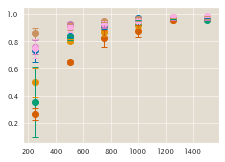

In [6]:
for gene in allgenes:
    v_mean = []
    v_std = []
    for count in allvals:
        
        goodrow = df.apply(check_correct,args=(gene,count),axis=1)
        right_row = df[goodrow]
        v_mean.append(np.mean(np.array(right_row[['rep0','rep1','rep2']])))
        v_std.append(np.std((np.array(right_row[['rep0','rep1','rep2']]))))
    plt.scatter(allvals,v_mean)
    plt.errorbar(allvals,v_mean,yerr=v_std,elinewidth=1,capsize=3,capthick=1,linewidth=0)
plt.savefig('downsample_err.eps',format='eps')